In [2]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
path = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/"

Processing DSpec_0336p0010.txt


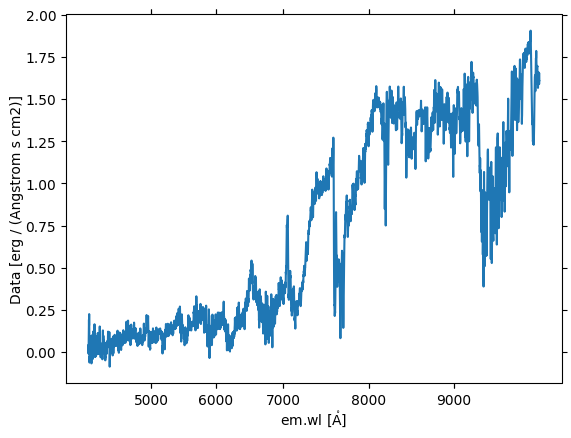

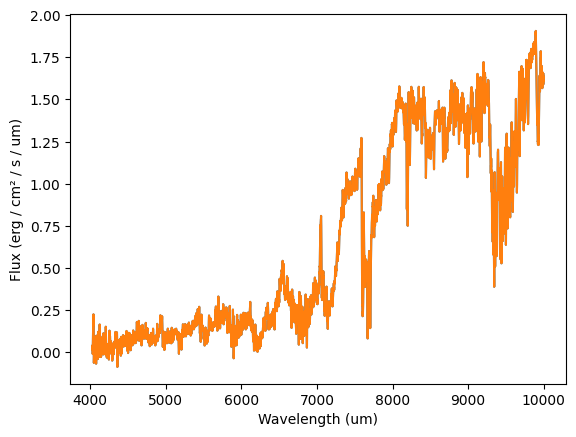

Processing DSpec_0723+0316.txt


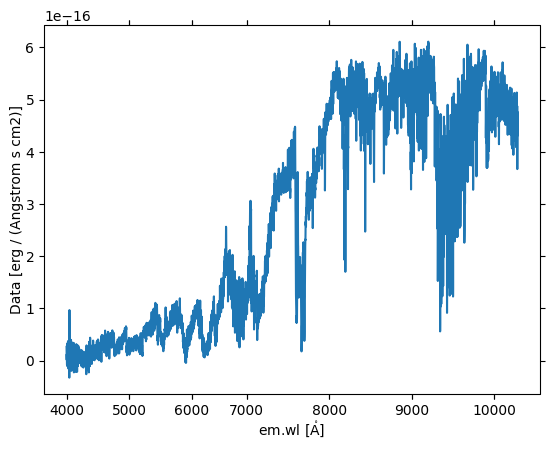

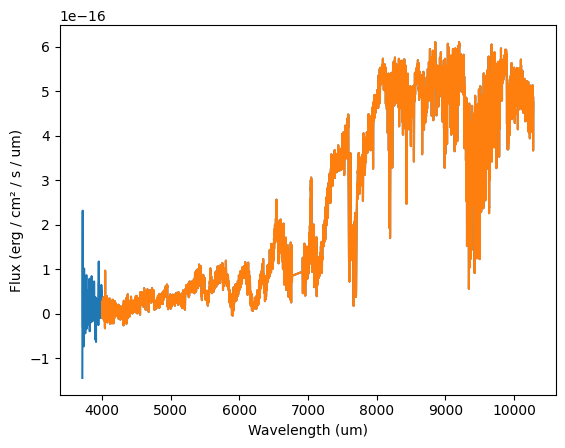

Processing DSpec_1941m0208.txt


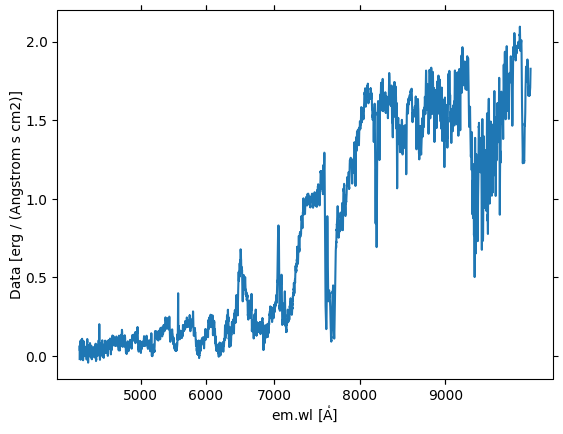

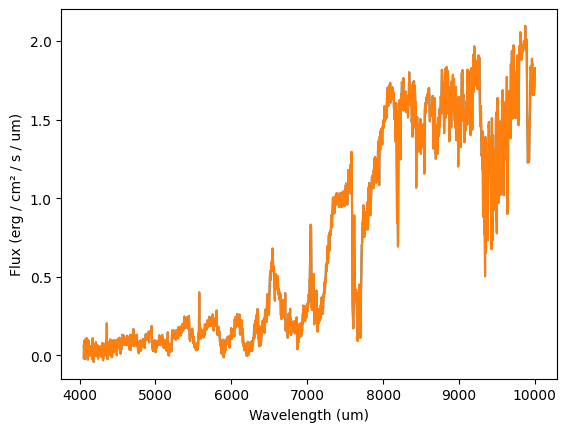

Processing DSpec_0130m1047.txt


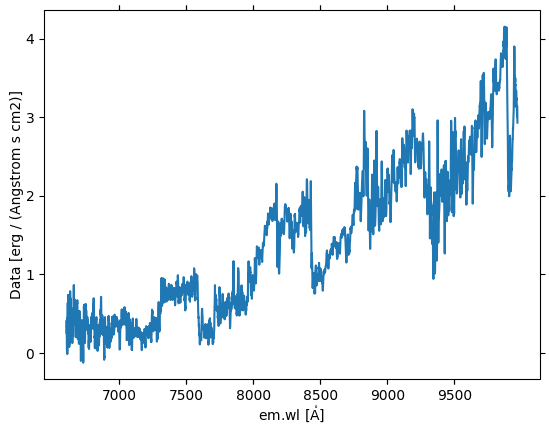

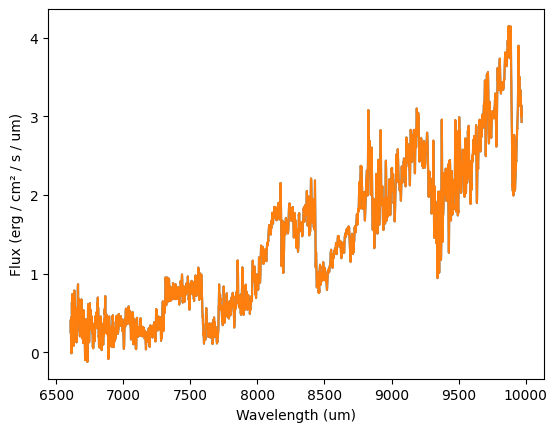

Processing DSpec_0043p2212.txt


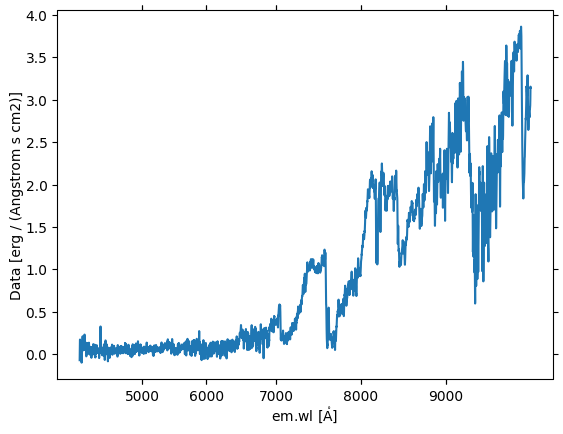

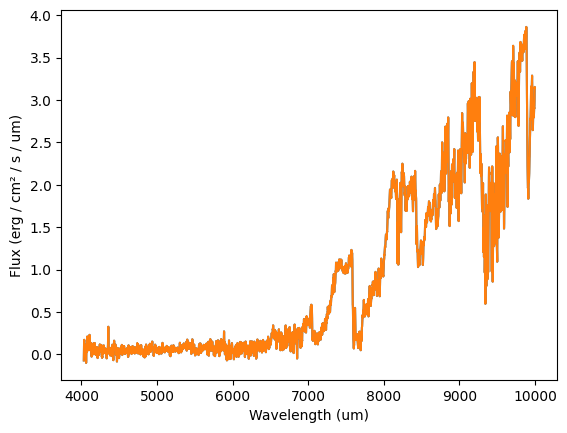

Processing DSpec_0559-2903.txt


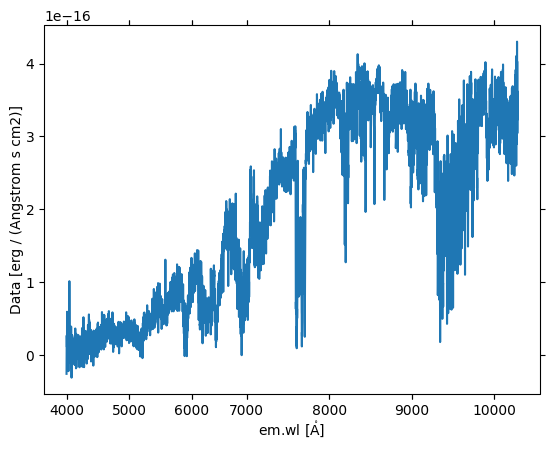

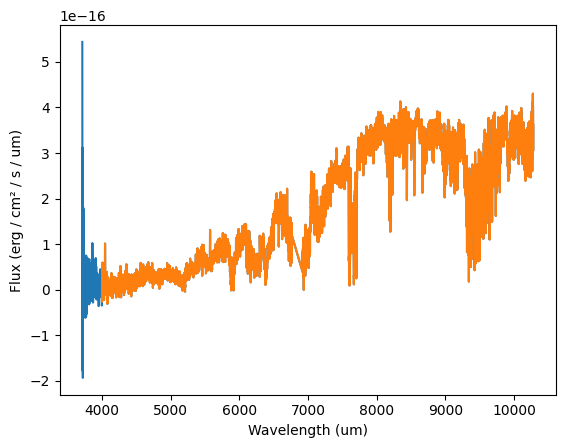

Processing DSpec_2134p7132.txt


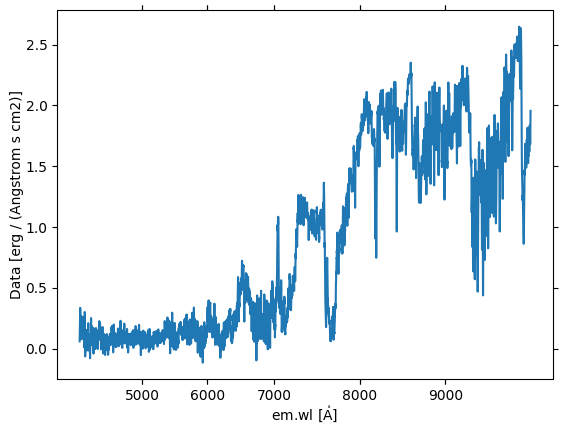

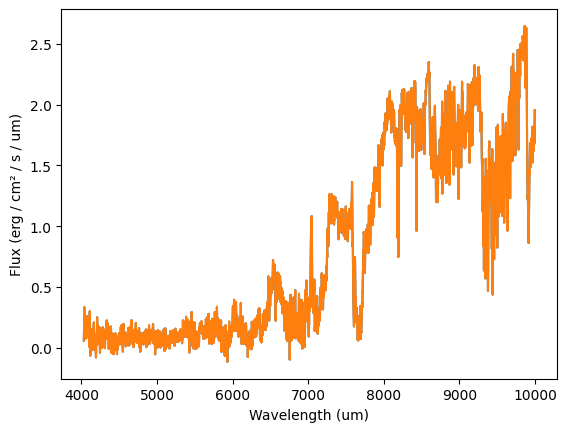

Processing DSpec_1434p2202.txt


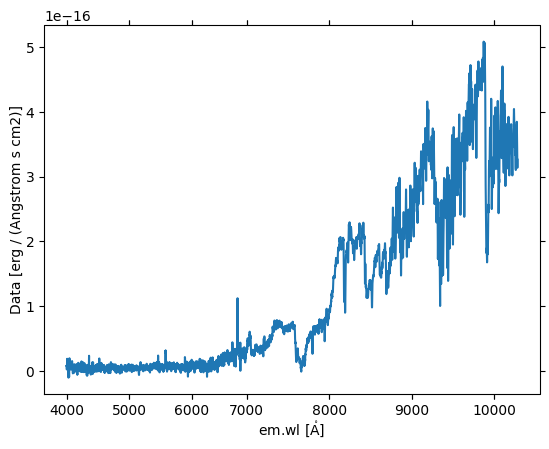

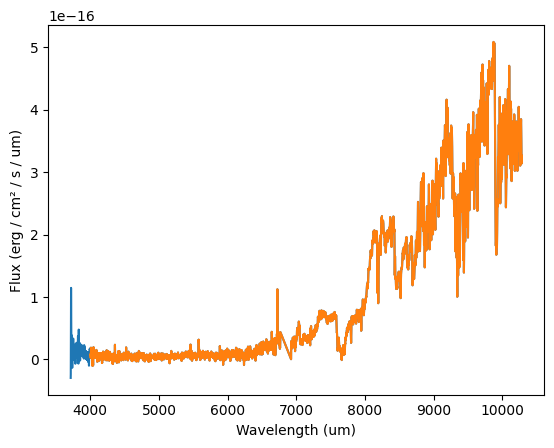

Processing DSpec_1158p0447.txt


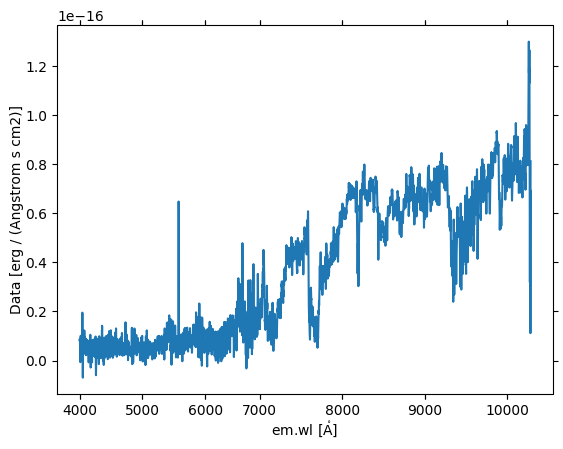

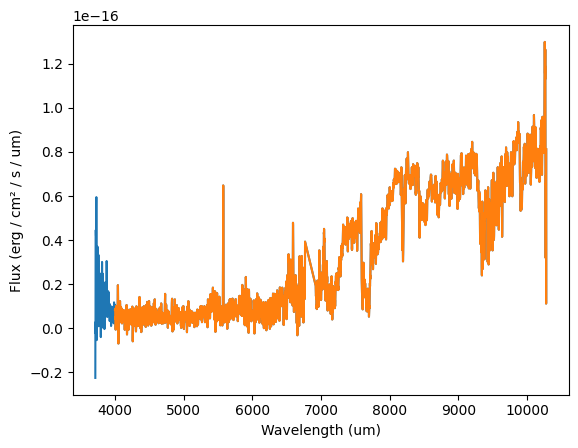

Processing DSpec_1256-1408.txt


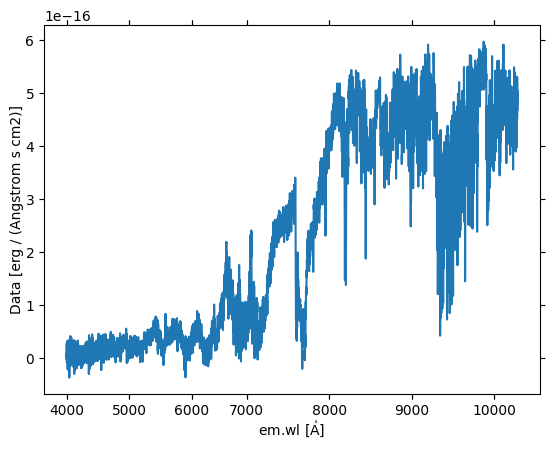

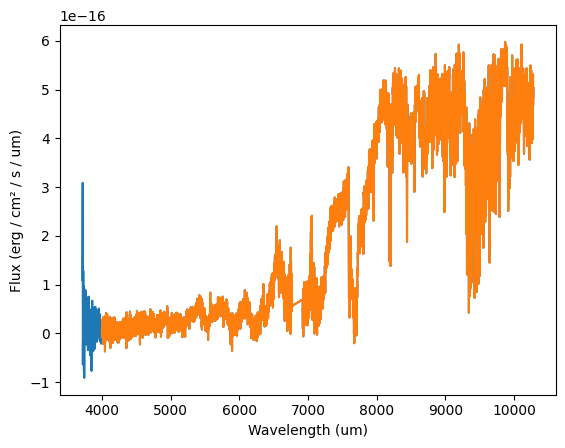

Processing DSpec_1425p7102.txt


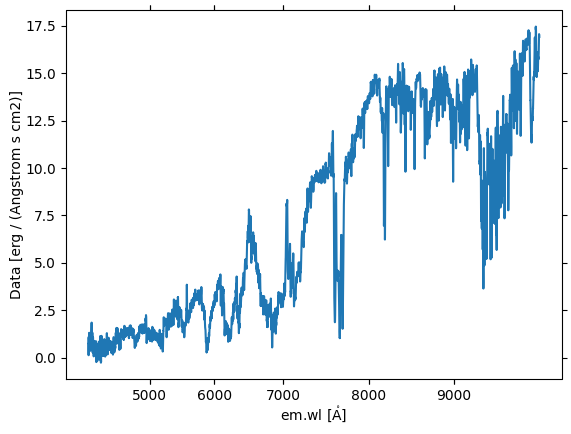

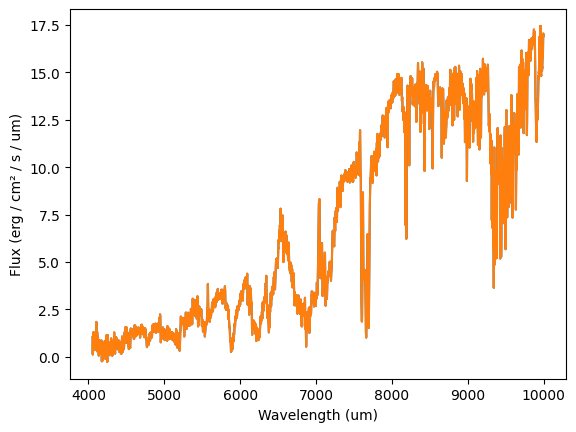

Processing DSpec_1416+1348.txt


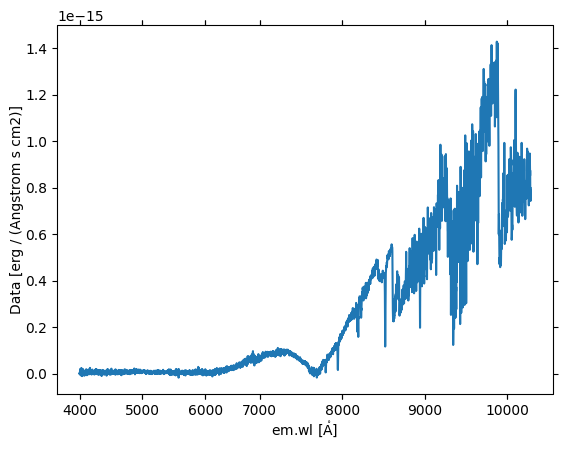

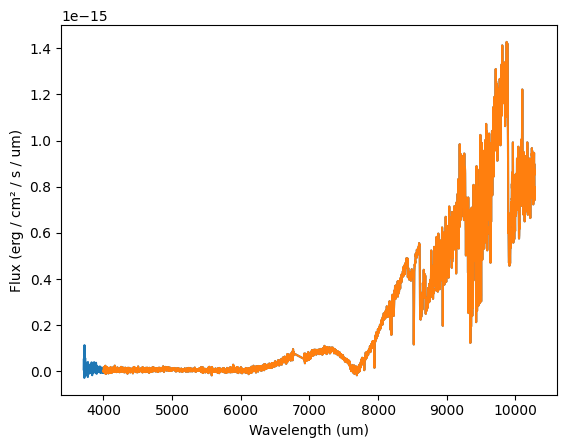

Processing DSpec_1244p1024.txt


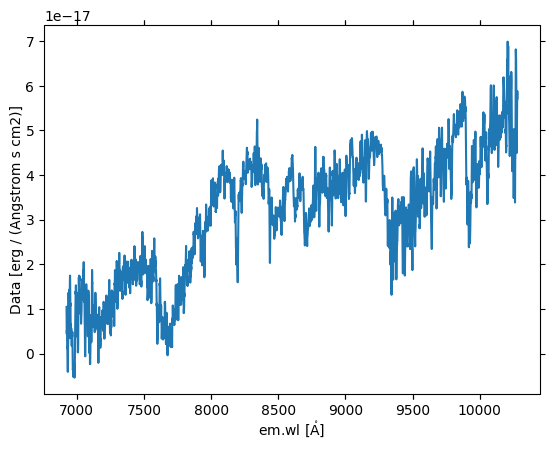

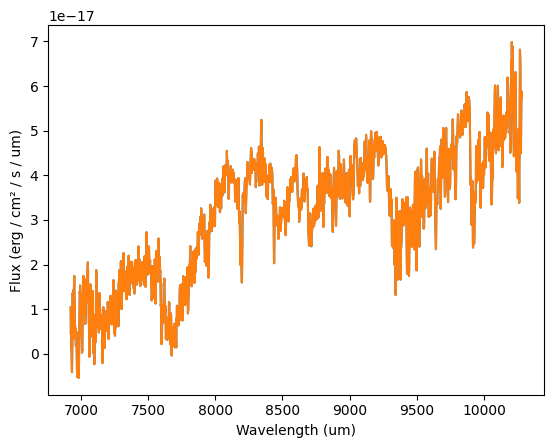

Processing DSpec_1452p2723.txt


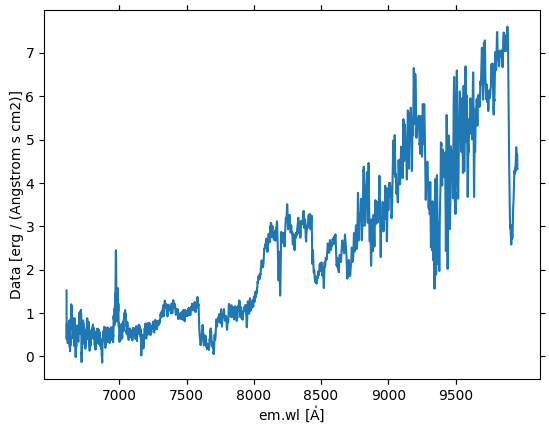

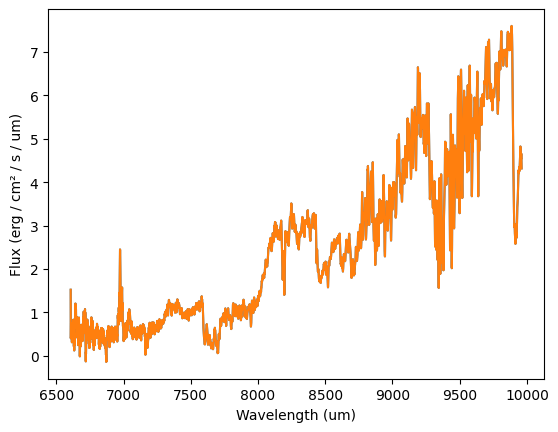

Processing DSpec_0822+1700.txt


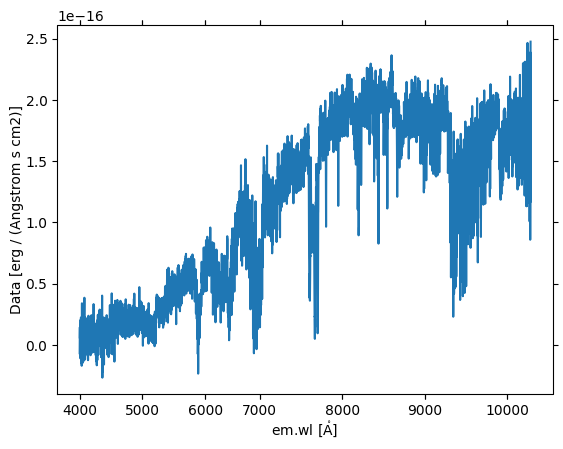

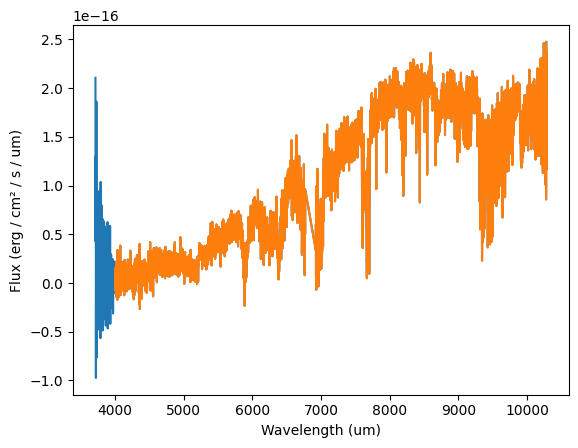

Total files plotted: 15


In [6]:
import matplotlib.pyplot as plt
file_plotted = 0
for filename in os.listdir(path):
    if "DSPEC" in filename.upper():
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.AA
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

        mask = np.logical_or(wavelength.value < 4000, wavelength.value > 15000)
             
        # Create Spectrum object
        spectrum = Spectrum(
            flux=flux,
            spectral_axis=wavelength,
            mask=mask
        )
        spectrum.plot()

        fig, ax = plt.subplots()
        ax.plot(spectrum.spectral_axis, spectrum.flux)
        ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask])

        ax.set_xlabel("Wavelength (um)")
        ax.set_ylabel("Flux (erg / cm² / s / um)")
        plt.show()
        file_plotted += 1
print(f"Total files plotted: {file_plotted}")
